In [329]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [330]:
species_df = pd.read_csv('species_info.csv');
observ_df = pd.read_csv('observations.csv');

pd.set_option('display.expand_frame_repr', False);

biodiversity_df = pd.merge(species_df, observ_df, on = 'scientific_name', how = 'outer');
print(biodiversity_df);


             category                scientific_name                                       common_names conservation_status                            park_name  observations
0              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN                  Bryce National Park           130
1              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN            Yellowstone National Park           270
2              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN  Great Smoky Mountains National Park            98
3              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN               Yosemite National Park           117
4              Mammal                      Bos bison                              American Bison, Bison                 NaN  

In [331]:
#print(biodiversity_df.columns);
#print(biodiversity_df.category.unique());
print(biodiversity_df[biodiversity_df['scientific_name'] == 'Canis lupus']);

    category scientific_name     common_names conservation_status                            park_name  observations
68    Mammal     Canis lupus        Gray Wolf          Endangered               Yosemite National Park            35
69    Mammal     Canis lupus        Gray Wolf          Endangered                  Bryce National Park            27
70    Mammal     Canis lupus        Gray Wolf          Endangered                  Bryce National Park            29
71    Mammal     Canis lupus        Gray Wolf          Endangered                  Bryce National Park            74
72    Mammal     Canis lupus        Gray Wolf          Endangered  Great Smoky Mountains National Park            15
73    Mammal     Canis lupus        Gray Wolf          Endangered            Yellowstone National Park            60
74    Mammal     Canis lupus        Gray Wolf          Endangered            Yellowstone National Park            67
75    Mammal     Canis lupus        Gray Wolf          Endangere

In [332]:
print(biodiversity_df.dtypes);

category               object
scientific_name        object
common_names           object
conservation_status    object
park_name              object
observations            int64
dtype: object


In [333]:
print(biodiversity_df.isna().sum());

category                   0
scientific_name            0
common_names               0
conservation_status    24752
park_name                  0
observations               0
dtype: int64


In [334]:
duplicates = biodiversity_df.duplicated();
print(duplicates.value_counts());

False    25601
True        31
dtype: int64


In [335]:
biodiversity_df = biodiversity_df.drop_duplicates();
duplicates_bio = biodiversity_df.duplicated();
print(duplicates_bio.value_counts());


False    25601
dtype: int64


In [336]:
biodiversity_df = biodiversity_df.reset_index(drop=True);
print(biodiversity_df);

             category                scientific_name                                       common_names conservation_status                            park_name  observations
0              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN                  Bryce National Park           130
1              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN            Yellowstone National Park           270
2              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN  Great Smoky Mountains National Park            98
3              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN               Yosemite National Park           117
4              Mammal                      Bos bison                              American Bison, Bison                 NaN  

In [337]:
unique_park_name_list = list(biodiversity_df.park_name.unique());
unique_sc_name_list = list(biodiversity_df.scientific_name.unique());

def create_park_columns(p_name):
    biodiversity_df[p_name] = biodiversity_df.apply(lambda row: \
                                                    row['observations']
                                                    if row['park_name'] == p_name
                                                    else 0,
                                                    axis = 1)
    return

for p_name in unique_park_name_list:
    create_park_columns(p_name);

print(biodiversity_df.head(10));
print(biodiversity_df.dtypes);

  category                scientific_name                                       common_names conservation_status                            park_name  observations  Bryce National Park  Yellowstone National Park  Great Smoky Mountains National Park  Yosemite National Park
0   Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN                  Bryce National Park           130                  130                          0                                    0                       0
1   Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN            Yellowstone National Park           270                    0                        270                                    0                       0
2   Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN  Great Smoky Mountains National Park            98                  

In [338]:
def dataframes_per_scnames(scname):
    biodiversity_dataframe = biodiversity_df[biodiversity_df["scientific_name"] == scname];
    new_biodiversity_dataframe = biodiversity_dataframe.copy();
    for park in unique_park_name_list:
        new_biodiversity_dataframe[park] = np.sum(new_biodiversity_dataframe[park]);
    new_biodiversity_dataframe = new_biodiversity_dataframe.drop_duplicates(subset = new_biodiversity_dataframe.columns[0:3]);
    return new_biodiversity_dataframe

for s_name in unique_sc_name_list:
    if s_name == biodiversity_df["scientific_name"][0]:
        new_biodiversity = dataframes_per_scnames(s_name);
    else:
        new_biodiversity = pd.merge(new_biodiversity, dataframes_per_scnames(s_name), how = 'outer');

print(new_biodiversity.head());

c:\Users\melbaabo\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
c:\Users\melbaabo\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
c:\Users\melbaabo\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
c:\Users\melbaabo\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric

  category                scientific_name                                       common_names conservation_status                  park_name  observations  Bryce National Park  Yellowstone National Park  Great Smoky Mountains National Park  Yosemite National Park
0   Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN        Bryce National Park           130                  130                        270                                   98                     117
1   Mammal                      Bos bison                              American Bison, Bison                 NaN     Yosemite National Park           128                   68                        269                                   77                     128
2   Mammal                     Bos taurus  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN        Bryce National Park            99                   99                        235          

In [339]:
print(new_biodiversity.isna().sum());

category                                  0
scientific_name                           0
common_names                              0
conservation_status                    5633
park_name                                 0
observations                              0
Bryce National Park                       0
Yellowstone National Park                 0
Great Smoky Mountains National Park       0
Yosemite National Park                    0
dtype: int64


In [340]:
new_biodiversity = new_biodiversity.drop(columns = ['park_name','observations']);
print(len(new_biodiversity));

5822


In [341]:
biodiversity_updated_df = new_biodiversity;
#print(biodiversity_updated_df.head());
#print(biodiversity_updated_df.category.unique())
#print(biodiversity_updated_df[biodiversity_updated_df['conservation_status'] == 'In Recovery']);
print(biodiversity_updated_df.head(20));

   category                scientific_name                                       common_names conservation_status  Bryce National Park  Yellowstone National Park  Great Smoky Mountains National Park  Yosemite National Park
0    Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN                  130                        270                                   98                     117
1    Mammal                      Bos bison                              American Bison, Bison                 NaN                   68                        269                                   77                     128
2    Mammal                     Bos taurus  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN                   99                        235                                   56                     124
3    Mammal                     Ovis aries  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)               

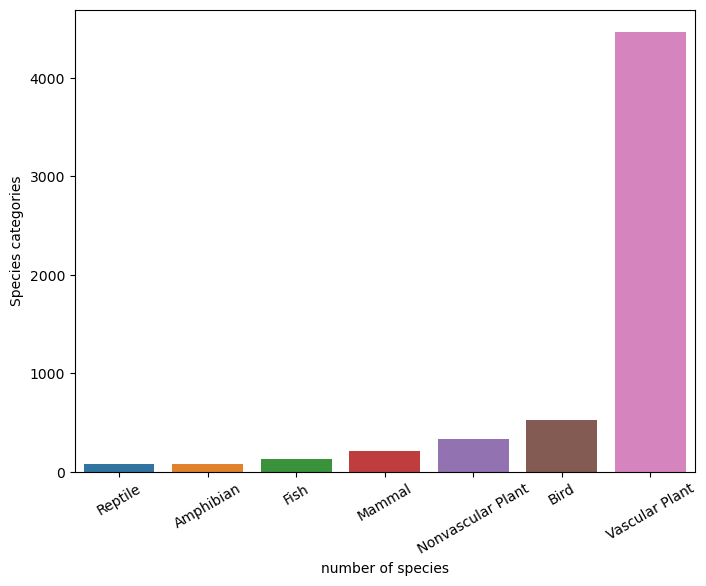

In [342]:
plt.figure(figsize=(8,6));
sns.countplot(x = biodiversity_updated_df["category"], order = biodiversity_updated_df["category"].value_counts(ascending=True).index);
plt.xticks(rotation = 30);
plt.xlabel('number of species');
plt.ylabel("Species categories");
plt.show();

In [343]:
def conservation_stat(category):
    stat_serie = {'Species of Concern':0 , 'Endangered':0, 'Threatened':0, 'In Recovery':0};
    for loc_index in range(0,len(biodiversity_updated_df)):
        if biodiversity_updated_df.category[loc_index] == category and biodiversity_updated_df['conservation_status'][loc_index] != np.nan:
            if biodiversity_updated_df['conservation_status'][loc_index] == 'In Recovery':
                stat_serie['In Recovery'] += 1;
            elif biodiversity_updated_df['conservation_status'][loc_index] == 'Species of Concern':
                stat_serie['Species of Concern'] += 1;
            elif biodiversity_updated_df['conservation_status'][loc_index] == 'Endangered':
                stat_serie['Endangered'] += 1;
            elif biodiversity_updated_df['conservation_status'][loc_index] == 'Threatened':
                stat_serie['Threatened'] += 1;
    return stat_serie;

mammal_stats = conservation_stat('Mammal');
print(mammal_stats);

{'Species of Concern': 28, 'Endangered': 6, 'Threatened': 2, 'In Recovery': 1}


In [344]:
unique_conservation_status = ('Species of Concern','Endangered','Threatened','In Recovery');
stats_per_category = {'Mammal':[],'Bird':[],'Reptile':[],'Amphibian':[],'Fish':[],'Vascular Plant':[],'Nonvascular Plant':[]}

for key in stats_per_category.keys():
    stat_object = conservation_stat(key);
    for skey in stat_object.keys():
        stats_per_category[key].append(stat_object[skey]);

print(stats_per_category);

{'Mammal': [28, 6, 2, 1], 'Bird': [72, 4, 0, 3], 'Reptile': [5, 0, 0, 0], 'Amphibian': [4, 1, 2, 0], 'Fish': [4, 3, 3, 0], 'Vascular Plant': [43, 1, 2, 0], 'Nonvascular Plant': [5, 0, 0, 0]}


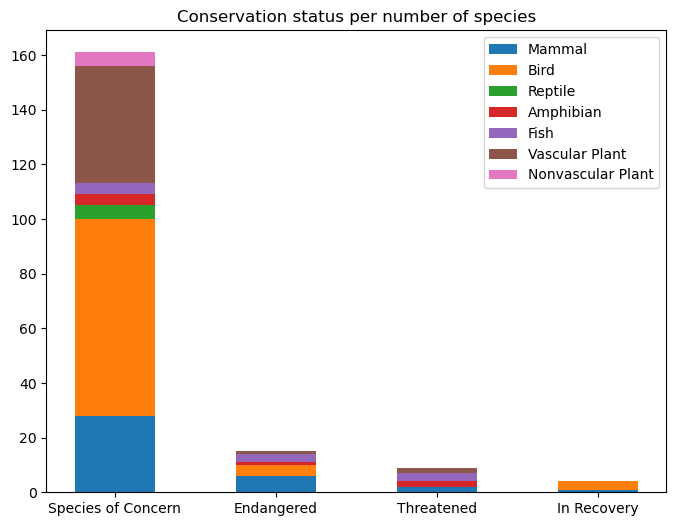

In [347]:
fig, ax = plt.subplots(figsize=(8,6));
bottom = np.zeros(4);
width = 0.5;

for category, stat in stats_per_category.items():
    p = ax.bar(unique_conservation_status, stat, width, label = category,  bottom = bottom)
    bottom += stat

ax.set_title("Conservation status per number of species")
ax.legend(loc="upper right")

plt.show()